# Treinando Modelos (CAP. 4)

## Regressão Linear

## Método dos Mínimos Quadrados

In [53]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) #retorna amostras da distribuição normal padrão (GAUSS)

### Função Linear + Ruído Gaussiano

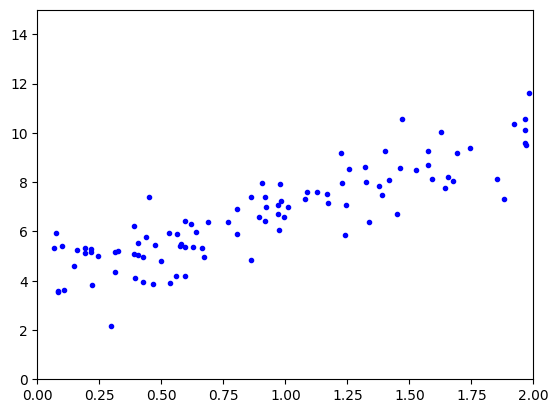

In [54]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Calculando Θ 

In [55]:
X_b = np.c_[np.ones((100,1)),X] # Adicionando x0 = 1 para toda instancia (termo de polarização)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [56]:
theta_best

array([[3.97231694],
       [2.94402391]])

### Fazendo previsões com Θ calculado:

In [57]:
X_new = np.array([[0],[2]])
y_pred = np.c_[np.ones((2,1)), X_new].dot(theta_best)
y_pred

array([[3.97231694],
       [9.86036477]])

### Plotando previsões do Modelo:

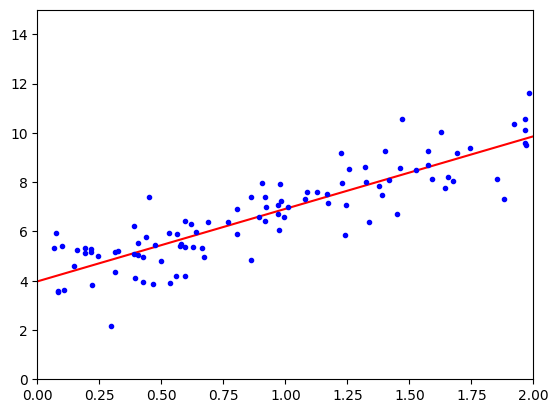

In [58]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Utilizando Scikit Learn:

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.97231694]), array([[2.94402391]]))

In [60]:
lin_reg.predict(X_new)

array([[3.97231694],
       [9.86036477]])

## Gradiente Descendente

### Gradiente Descendente em Lote:

#### Passo do Gradiente Descendente:

In [61]:
eta = 0.1 #taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range (n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.97231694],
       [2.94402391]])

>Ao calcular as derivadas parciais da função de custo, obtemos o vetor de Gradientes  que aponta para o aumento mais acentuado da curva. Dessa forma basta ir em direção oposta aplicando a taxa de aprendizado para restringir o passo de cada iteração 

### Gradiente Descendente Estocástico:

#### Função de Cronograma de Aprendizado:

In [62]:
n_epochs = 50 # refere-se ao número de etapas

t0, t1 = 5, 10 # hiperparâmetros submetidos ao cronograma

def learning_schedule(t):
    return t0/(t + t1)
theta = np.random.randn(2,1) 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) #instancia aleatória no intervalo m
        xi = X_b[random_index:random_index+1] #seleciona a coluna 0 e 1 referente ao termo de polarização e theta 1
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [63]:
theta

array([[3.90892478],
       [2.96279544]])

#### Classe SGDRegressor do Scikit Learn para a Regressão Linear

In [64]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel()) #achatando a matriz y para se tornar um array unidimensional


SGDRegressor(n_iter_no_change=50, penalty=None)

In [65]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.83504125]), array([3.07525149]))

## Regressão Polinomial

In [66]:
m = 100
X = 6 * np.random.rand(m, 1) - 3  
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # adicionando ruído a uma função quadrática

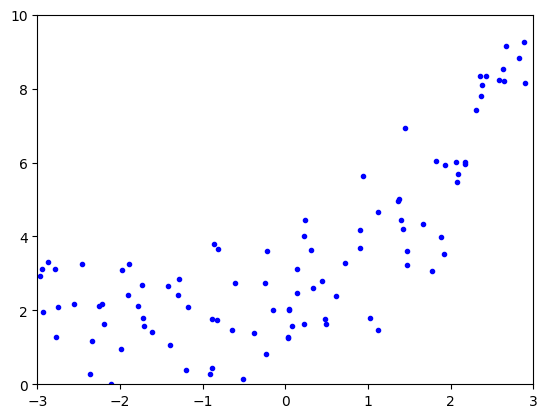

In [67]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

> É possível utilizar um modelo linear para acomodar dados não lineares adicionando o quadrado das características ao conjunto de treinamento como novas características. Em seguida basta utilizar um modelo linear nesse conjunto estendido.

### Adicionando o Quadrado das Características ao Conjunto de treinamento (extensão):

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("Feature: ", X[0,0], "Squared Feature: ", X_poly[0, 1])

Feature:  -0.5111332221444664 Squared Feature:  0.2612571707797845


### Ajustando a os Dados Estendidos a um Modelo Linear:

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept point: ", lin_reg.intercept_, "Coefficients: ","b = ", lin_reg.coef_[0,0], "a = ", lin_reg.coef_[0,1])

Intercept point:  [2.09472499] Coefficients:  b =  1.0769543175101746 a =  0.4524082815469806


In [70]:
X_new = np.array(np.arange(-3.0, 3.0 +0.1, .1))
X_new = np.reshape(X_new, (61, -1))


In [71]:
X_poly_new = poly_features.fit_transform(X_new)
y_pred = lin_reg.predict(X_poly_new)

### Plotando Polinomio do 2º Grau: 

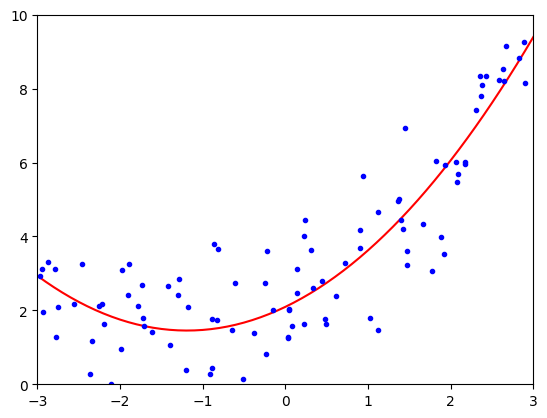

In [72]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

## Curvas de Aprendizado:

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves (model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "-+r", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "-b", linewidth=3, label ="Validation")
    plt.axis([0, 80, 0, 3 ])
    plt.xlabel("Tamanho do conjunto de treinamento")
    plt.ylabel("RMSE")
    plt.legend(loc="upper right")
    

### Plotando Curva de Aprendizado utilizando um Modelo Linear:

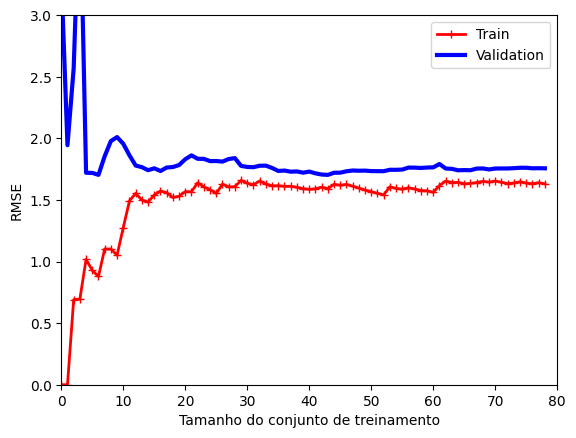

In [74]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- >*Curva de treinamento:* o modelo se ajusta quase que perfeitamente para poucas instâncias, e a medida que o tamanho do conjunto de treinamento aumenta, o modelo começa a se subajustar em decorrência do ruído e da não linearidade dos dados. A curva ascende até um platô (RMSE não melhora nem piora a medida que novas instâncias são adicionadas)
- >*Curva de validação:* Inicialmente, por haver poucas instâncias, o modelo generaliza muito mal. A medida que são apresentados novas amostras de treinamento, o modelo aprende e o erro na validação começa a diminuir. Entretanto uma linha reta não consegue modelar muito bem os dados, então novamente acaba em um platô próximo a outra curva   

### Modelo Polinomial (10º grau):

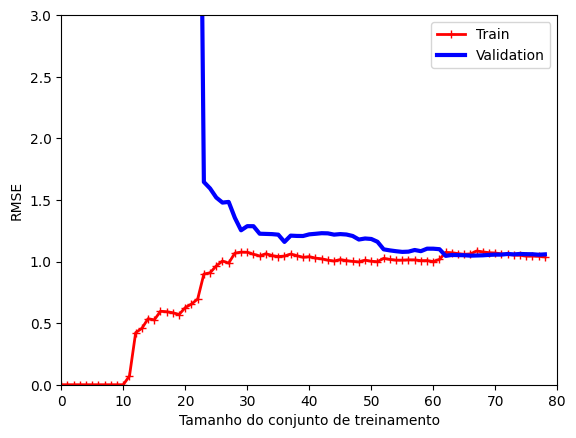

In [75]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
     ("lin_reg", LinearRegression()),
     ])
plot_learning_curves(polynomial_regression, X, y)

## Modelos Lineares Regularizados:

> Regularizar significa restringir o modelo para que não ocorram sobreajustes. Ao diminuir o grau de liberdade de um modelo mais difícil será o sobreajuste. Para modelos Lineares, utiliza-se normalmente a Regressão de Ridge (L2), Regressão de Lasso (L1) e Elastic Net 

### Regressão de Ridge:



- Versão regularizada da Regressão Linear;
  
- Termo de Regularização é adicionado à função de custo;
- Termo de regularização é a metade do quadrado da norma l2;
  
- Apenas adicionado à função de custo durante o treinamento;
  
- Hiperparâmetro Alpha controla a intensidade de regularização;
  
  - Alpha = 0 -> Regressão Linear;
  
  - Alpha muito grande -> Pesos próximos de zero (Linha quase Plana);
  
- Termo de Polarização não é regularizado;
  
- Para a Regressão de Ridge, é importante escalonar os dados (alta sensibilidade);
  
- Forma fechada e com Gradiente Descendente.

#### Forma fechada:

In [76]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") #fatoração de Cholesky
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.05948397]])

#### Gradiente Descendente Estocástico:

In [77]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.0491396])

### Regressão Lasso (Last Absolute Shrinkage and Selection Operator Regression):

- Versão regularizada da Regressão Linear;
  
- Termo de regularização é o somatório do valor absoluto do vetor de pesos; 
  
- Hiperparâmetro Alpha controla a intensidade de regularização;
  
  - Alpha = 0 -> Regressão Linear;
  
  - Alpha muito grande -> Pesos iguais a zero (Linha Plana);
  
- Automatiza a seleção de características;

-  Exibe um modelo esparso (poucos valores diferentes de 0)
  

In [79]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.01597181])